In [1]:
import Bio.SeqIO
import numpy as np
import math
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
def MSA_gapstrip(MSA,rate):
    gap_count = 0
    gap_index = []
    MSA_nogap = []
    
    for i in range(len(MSA[0])):
        for j in range(len(MSA)):
            if(MSA[j][i] == '-'):
                gap_count = gap_count + 1
        if(gap_count/len(MSA) > rate):
            gap_index.append(i)
        gap_count = 0
    
    for index in gap_index:
        for k in range(len(MSA)):
            if (index == 0 ):
                MSA[k] =  " " + MSA[k][1:]
            else:
                MSA[k] = MSA[k][:index] + " " + MSA[k][index+1:]
    
    for i in range(len(MSA)):
        MSA_nogap.append(str(MSA[i]).replace(" ",""))

    return MSA_nogap



def MI_score(MSA_nogap):
    
    AMINO = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','X','Y'] #21
    MI_score = []
    
    
    for i in tqdm(range(len(MSA_nogap[0]))):
        for j in range(len(MSA_nogap[0])):
            
            MI_temp = []
            for a_num in range(len(AMINO)):

                a = AMINO[a_num]
                Pa = 0
                for length in range(len(MSA_nogap)):
                    if (a == MSA_nogap[length][i]):
                        Pa = Pa + 1
                Pa = Pa / len(MSA_nogap)

                for b_num in range(len(AMINO)):

                    b = AMINO[b_num]
                    Pb = 0
                    Pab = 0
                    for length in range(len(MSA_nogap)):
                        if (b == MSA_nogap[length][j]):
                            Pb = Pb + 1
                        if (a == MSA_nogap[length][i] and b == MSA_nogap[length][j]):
                            Pab = Pab + 1
                    Pb = Pb / len(MSA_nogap)
                    Pab = Pab / len(MSA_nogap)
                    if(Pa*Pb == 0 or Pab == 0):
                        MI = 0
                    else:
                        MI = Pab * math.log(Pab/(Pa*Pb))

                    MI_temp.append(MI)
            MI_score.append((i,j,sum(MI_temp)))
            
    return MI_score


def draw(MI):
    
    #normalize
    matrix = []

    temp = []
    temp.append(MI[0][2])
    for i in range(1,len(MI)):
        if(MI[i][0] == MI[i-1][0]):
            temp.append(MI[i][2])
        else:
            matrix.append(temp)
            temp = []
            temp.append(MI[i][2])

    matrix.append(temp)
    
    maxvalue = 0
    for i in range(len(matrix)):
        if(max(matrix[i]) > maxvalue):
            maxvalue = max(matrix[i])

    normalize_matrix = matrix/maxvalue
    
    #draw
    plt.imshow(normalize_matrix, interpolation='nearest', cmap=plt.cm.binary)
    plt.colorbar()
    
    return normalize_matrix

In [3]:
for record in Bio.SeqIO.parse("data/tetR_N.fasta","fasta"): 
    print(record)

ID: tetR_N
Name: tetR_N
Description: tetR_N
Number of features: 0
Seq('VINSALELLNEVGIEGLTTRPLAQKLGVEQPTLYWHVKNKRALL')


In [4]:
#MSA num 41550 
MSA = []
for record in Bio.SeqIO.parse("MSA.fasta","fasta"):
    MSA.append(record.seq)

In [5]:
#MSA example
str(MSA[0])

'--------------------LIEAA-FNQ-LS-AE----H-S-----F----S----N---L--S-LRE----VAR--EA---G---I---A--P--T--S--F-Y-R-HF-----K-DMNELGLT-L-------------------'

In [7]:
#gap_strip
rate_list = [1,0.95,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0]
for rate in rate_list:
    
    MSA = []
    for record in Bio.SeqIO.parse("MSA.fasta","fasta"):
        MSA.append(record.seq)
        
    MSA_nogap = MSA_gapstrip(MSA,rate)
    print("rate:",rate ," ,sequence_length:",len(MSA_nogap[0]))

rate: 1  ,sequence_length: 147
rate: 0.95  ,sequence_length: 54
rate: 0.9  ,sequence_length: 51
rate: 0.8  ,sequence_length: 50
rate: 0.7  ,sequence_length: 49
rate: 0.6  ,sequence_length: 48
rate: 0.5  ,sequence_length: 47
rate: 0.4  ,sequence_length: 46
rate: 0.3  ,sequence_length: 45
rate: 0.2  ,sequence_length: 44
rate: 0.1  ,sequence_length: 41
rate: 0  ,sequence_length: 0


Because the sequence:'VINSALELLNEVGIEGLTTRPLAQKLGVEQPTLYWHVKNKRALL' is length 44,
So we choose the rate = 0.2, and make the MSA_nogap sequence length is 44 too.

In [33]:
MSA = []
for record in Bio.SeqIO.parse("MSA.fasta","fasta"):
    MSA.append(record.seq)
        
rate = 0.7
MSA_nogap = MSA_gapstrip(MSA,rate)
print("rate:",rate ," ,sequence_length:",len(MSA_nogap[0]))

rate: 0.7  ,sequence_length: 49


In [34]:
#MSA_nogap example
MSA_nogap[0]

'-LIEAAFNQLSEHSFSNLSLREVAREAGIAPTSFYRHFKDMNELGLT-L'

In [30]:
#now we calucte the MI score
MI_score_list = MI_score(MSA_nogap)

100%|████████████████████████████████████████| 51/51 [1:42:54<00:00, 121.07s/it]


In [31]:
np.save("MI_score/MI_score_49",MI_score_list)

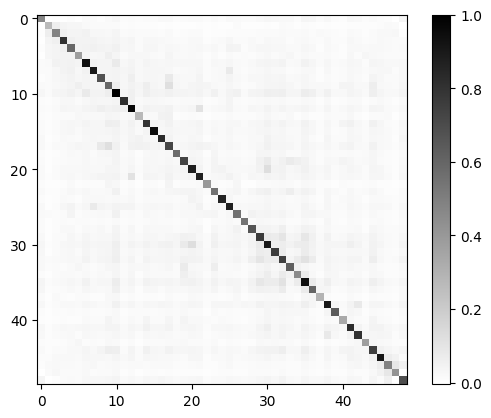

In [32]:
a = np.load("MI_score/MI_score_49.npy")
b = draw(a)